In [10]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
fallhit = pd.read_csv(r'E:\netData\MAG-all\paper & hit.zip')

In [4]:
fLaupapers = pd.read_csv(r"E:\netData\MAG-nobel\Nobel Laureates pubs.zip")
fLaupaperswinningpaper = fLaupapers[fLaupapers['Is prize-winning paper'] == 'YES']

In [59]:
fpaperscounter = pd.read_csv(r"E:\netData\MAG-nobel\Nobel counterparts\Nobel counterparts field.zip")

fpaperscounter['hitcitnum'] = fpaperscounter['paperid'].map(fallhit.set_index('paperid')['hitcitnum'])
fpaperscounter.fillna(0 , inplace = True)

In [113]:
fpaperscounter = fpaperscounter[fpaperscounter['If Prize']==0]

In [114]:
fpaperscounter[['cit' , 'hitcitnum']].describe()

,cit,hitcitnum
count,9376.000000,9376.000000
mean,66.757999,2.530290
std,552.436296,13.520518
min,0.000000,0.000000
25%,5.000000,0.000000
50%,18.000000,0.000000
75%,51.000000,2.000000
max,49412.000000,778.000000


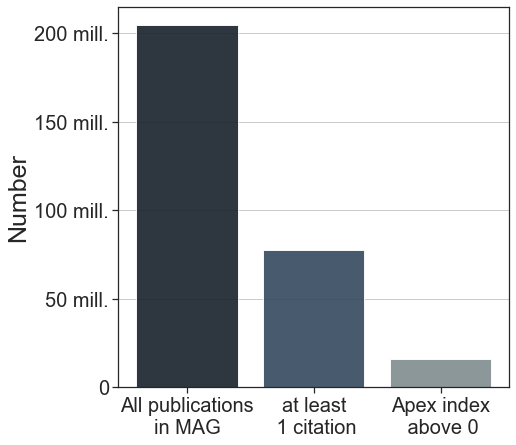

In [98]:
y_pos = [1,2,3,]
d = [204682700 , 77427320 , 15924856]
f, ax = plt.subplots(figsize=(7, 7))

plt.bar(y_pos, d,align='center', color= ['#17202A','#34495E' ,'#7F8C8D'],alpha=0.9)
ax.yaxis.grid(True)
#plt.ylim(0,300)
plt.yticks([0,50000000,100000000,150000000,200000000],[0,'50 mill.' , '100 mill.' , '150 mill.','200 mill.'] , size = 20)
plt.xticks([1,2,3],['All publications\nin MAG','at least\n 1 citation' , 'Apex index\n above 0'],fontsize = 20)
plt.ylabel(r'Number',fontsize = 25)
ax.set(xlabel="")
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 2\1.pdf",bbox_inches = 'tight')

In [117]:
d1 = fLaupaperswinningpaper[fLaupaperswinningpaper['Field'] == 'Physics']['hitcitnum'].values
d2 = fLaupaperswinningpaper[fLaupaperswinningpaper['Field'] == 'Chemistry']['hitcitnum'].values
d3 = fLaupaperswinningpaper[fLaupaperswinningpaper['Field'] == 'Medicine']['hitcitnum'].values

d4 = fpaperscounter[fpaperscounter['Field'] == 'Physics']['hitcitnum'].values
d5 = fpaperscounter[fpaperscounter['Field'] == 'Chemistry']['hitcitnum'].values
d6 = fpaperscounter[fpaperscounter['Field'] == 'Medicine']['hitcitnum'].values
d7 = fallhit['hitcitnum'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

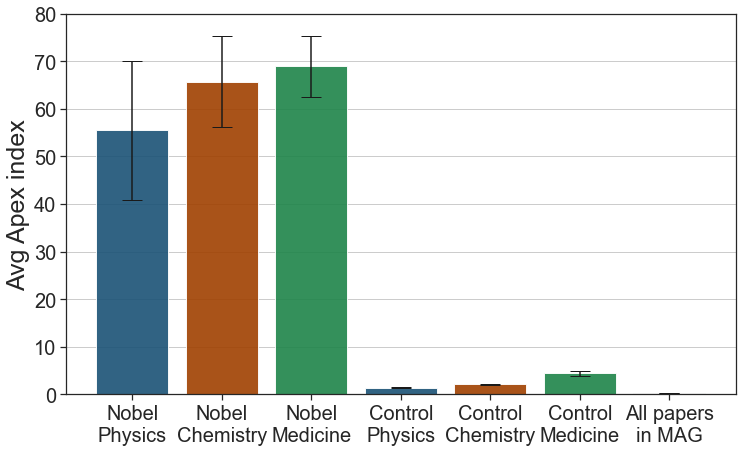

In [118]:
y_pos = [1,2,3,4,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449','#7F8C8D'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,80))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine', 'All papers\nin MAG'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel(r'Avg Apex index',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 2\2.pdf",bbox_inches = 'tight')

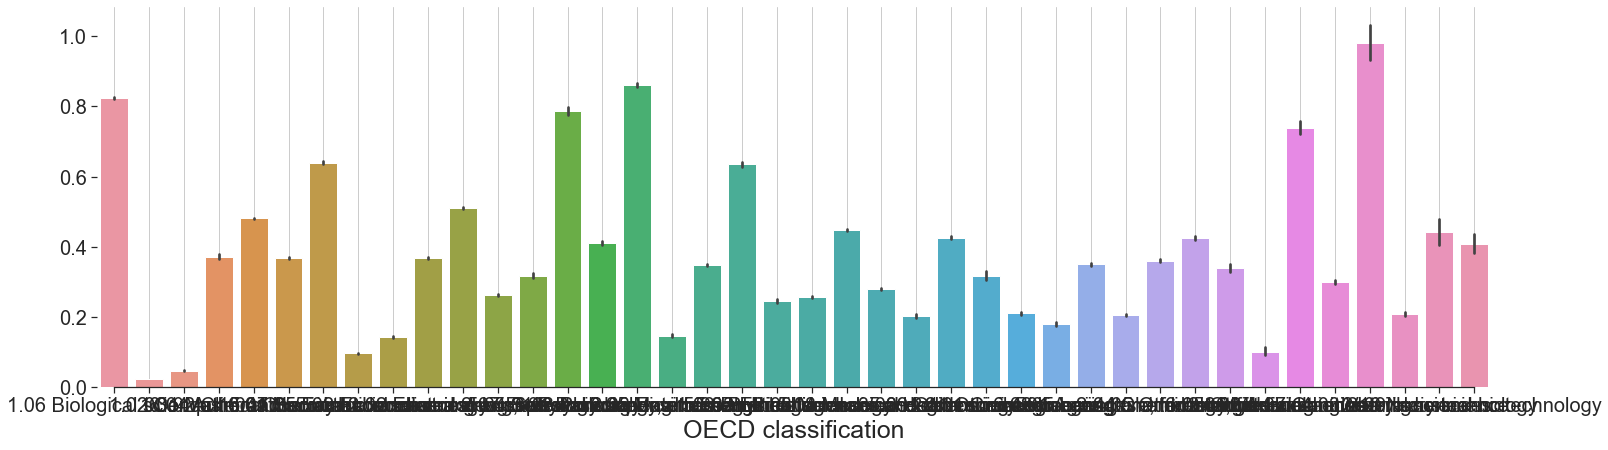

In [91]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(25, 7))
#ax.set_xscale("log")
# font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False


sns.barplot(
    data=fallhit,x="oecd2", y="hitcitnum"
)

ax.xaxis.grid(True)
#plt.xlim(0,25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel(r'OECD classification',fontsize = 25)
plt.ylabel(r'Avg Apex index',fontsize = 25)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\STI apex index\figs\fig 2\3.pdf",bbox_inches = 'tight')